In [137]:
# dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
ardd_path = "data_raw/ardd_fatalities Sep 2020.csv"

# assign csv info into ardd
ardd = pd.read_csv(ardd_path,header=0,dtype={"Speed Limit":"string",
                                             "National Remoteness Areas": "string",
                                             "SA4 Name 2016": "string",
                                             "National LGA Name 2017": "string",
                                             "National Road Type": "string"})
#  ,usecols != ['National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017','National Road Type']
# preview data
ardd.head(1)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,3:11,Single,-9,-9,-9,...,16,Inner Regional Australia,Bendigo,Greater Bendigo (C),National or State Highway,No,No,0_to_16,Weekend,Night


In [138]:
# remove unwanted columns "National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"
clean_ardd = ardd.drop(columns=["National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"])

# gather latest and earliest year for the title
min_year = clean_ardd["Year"].min()
max_year = clean_ardd["Year"].max()

# replace the "_" with " " in column "Age Group"
clean_ardd["Age Group"] = clean_ardd["Age Group"].str.replace("_"," ")

# remove the ":" in column "Time"
clean_ardd["Time"] = clean_ardd["Time"].str.replace(":","")

# replace "-9" with Unknown as described in the data dictionary
clean_ardd=clean_ardd.replace({"-9":"Unknown"}).replace({-9: "Unknown"})

# change data type from String to Int
clean_ardd['Year'] = clean_ardd['Year'].astype(int)

# remove rows with Unknown time
clean_ardd = clean_ardd[clean_ardd.Time != "Unknown"]
clean_ardd.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,311,Single,Unknown,Unknown,Unknown,Unknown,Passenger,Male,16,No,No,0 to 16,Weekend,Night


In [139]:
display(clean_ardd["Speed Limit"].value_counts())
display(clean_ardd["Speed Limit"].unique())

100            17878
60             13497
80              5956
110             5858
50              2780
70              2476
Unknown         1352
90              1115
40               333
75               254
130              111
20                26
10                18
30                14
<40                5
5                  3
25                 2
Unspecified        2
15                 1
Name: Speed Limit, dtype: int64

array(['Unknown', '100', '80', '90', '70', '110', '60', '50', '130', '40',
       '10', '30', '25', '20', '15', '<40', '5', 'Unspecified', '75'],
      dtype=object)

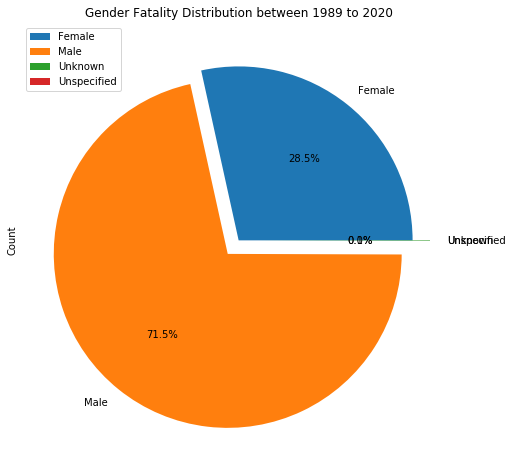

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_ardd[["Crash ID","Gender"]]
groupby_gender = gender_df.groupby(["Gender"])

# calculate count
count = groupby_gender["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0,0.1,0.1,0.1]
plot = groupby_gender_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Gender Fatality Distribution between {min_year} to {max_year}")
plt.show()

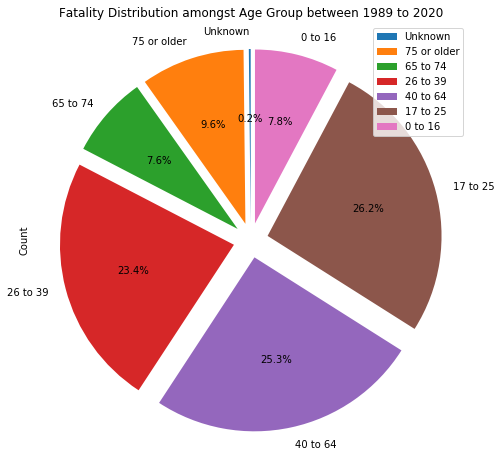

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ageg_df = clean_ardd[["Crash ID","Age Group"]]
groupby_ageg = ageg_df.groupby(["Age Group"])

# calculate count
count = groupby_ageg["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_ageg_df = pd.DataFrame({"Count": count
                           })

groupby_ageg_df = groupby_ageg_df.reindex(['Unknown','75 or older', '65 to 74', '26 to 39', '40 to 64', '17 to 25' ,'0 to 16'])

# set the explode value
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plot = groupby_ageg_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=90, autopct="%1.1f%%")
plt.title(f"Fatality Distribution amongst Age Group between {min_year} to {max_year}")


plt.show()

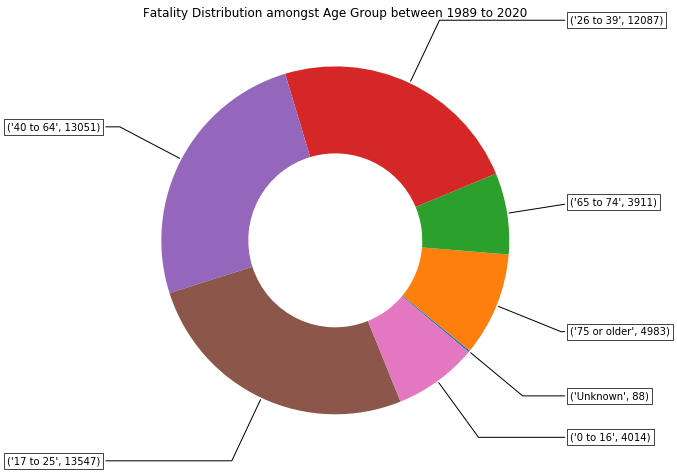

In [148]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(groupby_ageg_df["Count"], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate((groupby_ageg_df.index[i],groupby_ageg_df["Count"][i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title(f"Fatality Distribution amongst Age Group between {min_year} to {max_year}")

plt.show()


## Time vs Deaths since 2010

In [149]:
# capture fatality data after year 2010
time_fatality_df = clean_ardd.loc[clean_ardd['Year'] >= 2010]
time_fatality_df = clean_ardd.Time.value_counts().reset_index().rename(columns={'index': 'Time', 'Time': 'Count'})

# update data type to integer
time_fatality_df['Time'] = time_fatality_df['Time'].astype(int)

# sort result by Time
time_fatality_df = time_fatality_df.sort_values(by='Time', ascending=True)

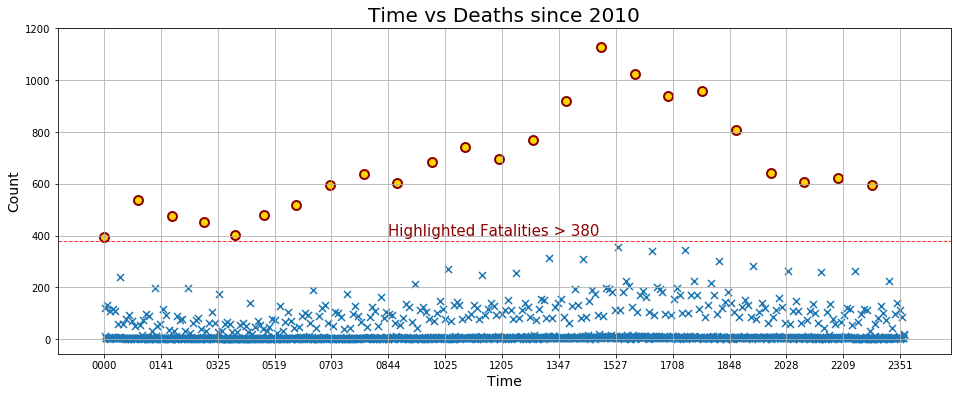

In [254]:
# plot graph to show Time vs Deaths after 2010
fig, ax = plt.subplots(figsize=(16, 6))
# marker_size=5

# arrange the x interval
plt.xticks(np.arange(0, 2400, step=100))

plt.scatter(time_fatality_df['Time'].map("{:04}".format),time_fatality_df['Count'], s= 50 ,marker = "x")
plt.title('Time vs Deaths since 2010',fontsize =20)
plt.xlabel('Time',fontsize =14)
plt.ylabel('Count',fontsize =14)
ax.grid()

# highlight the number of fatalities that's with the greatest trend
outlier_time_fatality_df = time_fatality_df.query('Count >= 380')
plt.scatter(outlier_time_fatality_df["Time"].map("{:04}".format), outlier_time_fatality_df["Count"],s=80,
            alpha=1, color="gold" , marker="o", edgecolors="darkred",linewidths=2)
plt.axhline(y=380, color='r', linestyle="dashed",linewidth=1, alpha=0.8)
plt.annotate("Highlighted Fatalities > 380",(500,400),fontsize=15,color="darkred")
plt.show()

## Day of Week vs. Fatality

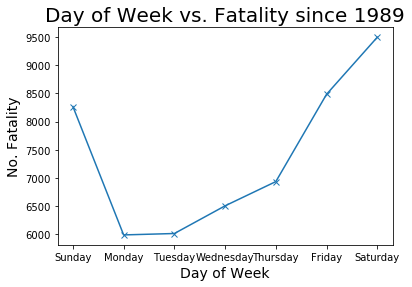

In [255]:
# Generate a pie plot showing the distribution of dayweek versus number of crashes mice using pandas
dc_df = clean_ardd[["Dayweek","Crash ID"]]

# group by the Day of Week and count the number of fatality
groupby_dayweek = dc_df.groupby(["Dayweek"])

# calculate count
count = groupby_dayweek["Crash ID"].count()

# create a dataframe to hold Day of week and Count
groupby_dayweek_df = pd.DataFrame({"Count": count
                           })

# manually rearrange the Day of Week index
groupby_dayweek_df = groupby_dayweek_df.reindex(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'])

# plot the graph
plt.plot(groupby_dayweek_df, marker = "x")

plt.title(f"Day of Week vs. Fatality since {min_year}",fontsize =20)
plt.ylabel("No. Fatality",fontsize =14)
plt.xlabel("Day of Week",fontsize =14)
plt.show()

## Speed limit vs. No. of Deaths

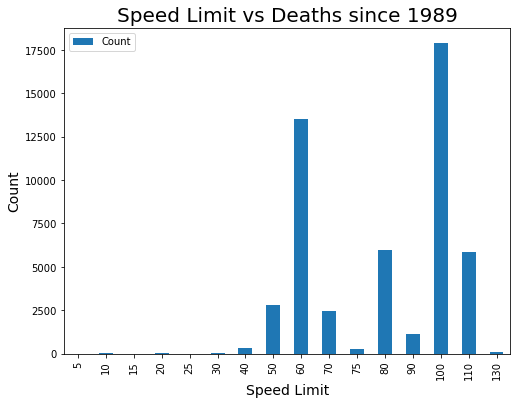

In [11]:
# capture Speed Limit and Crash ID into new dataframe
spdlmt_df = clean_ardd[["Speed Limit","Crash ID"]]

# remove "unknown", "unspecified" and "<40"
spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] != "Unknown") 
                      & (spdlmt_df["Speed Limit"] != "Unspecified") 
                     & (spdlmt_df["Speed Limit"] != "<40") ]

# uniform the data type to INT as some of it is in STR
spdlmt_df["Speed Limit"] = spdlmt_df["Speed Limit"].astype(int)


# group by the Speed Limit and count the number of fatality
groupby_spdlmt = spdlmt_df.groupby(["Speed Limit"])

# calculate count
count = groupby_spdlmt["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_spdlmt_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_spdlmt_df.plot(kind="bar", figsize=(8,6))

# Set a Title and labels
plt.title(f"Speed Limit vs Deaths since {min_year}", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.show()

## Fatality by State

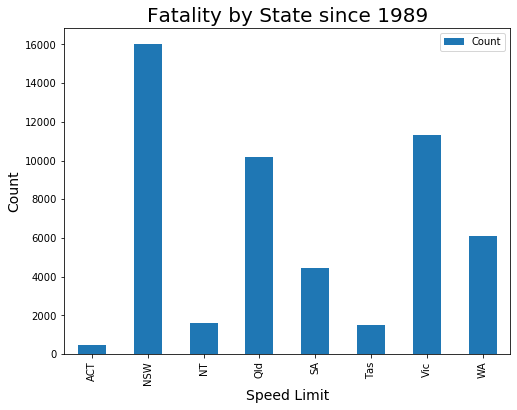

In [12]:
# capture Speed Limit and Crash ID into new dataframe
state_year_df = clean_ardd[["State","Year"]]

# group by the Speed Limit and count the number of fatality
groupby_state = state_year_df.groupby(["State"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold Sex and Count
groupby_state_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_state_df.plot(kind="bar", figsize=(8,6))

# Set a Title and labels
plt.title(f"Fatality by State since {min_year}", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.show()

## Fatalities over time since 1989

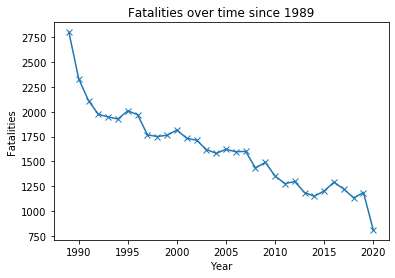

In [256]:
# capture Speed Limit and Crash ID into new dataframe
state_year_df = clean_ardd[["State","Year"]]

# group by the Speed Limit and count the number of fatality
groupby_state = state_year_df.groupby(["Year"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold Sex and Count
groupby_year_df = pd.DataFrame({"Count": count
                           })

plt.plot(groupby_year_df, marker = "x")
plt.title(f"Fatalities over time since {min_year}")
plt.ylabel("Fatalities")
plt.xlabel("Year")
plt.show()